<a href="https://colab.research.google.com/github/Lavya-Thapar/Speech-emotion-detection/blob/main/speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle


In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/



In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:23<00:00, 15.1MB/s]
100% 428M/428M [00:23<00:00, 18.8MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils


In [ ]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')


Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_bite_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_neat_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_fit_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_shout_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_size_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry


In [ ]:
df['label'].value_counts()

label
sad        400
disgust    400
angry      400
neutral    400
happy      400
ps         400
fear       400
Name: count, dtype: int64

In [ ]:
df['label_count']= df['label'].value_counts()

In [ ]:
df.head()

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,sad,NaN
1,/content/tess toronto emotional speech set dat...,sad,NaN
2,/content/tess toronto emotional speech set dat...,sad,NaN
3,/content/tess toronto emotional speech set dat...,sad,NaN
4,/content/tess toronto emotional speech set dat...,sad,NaN


In [ ]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

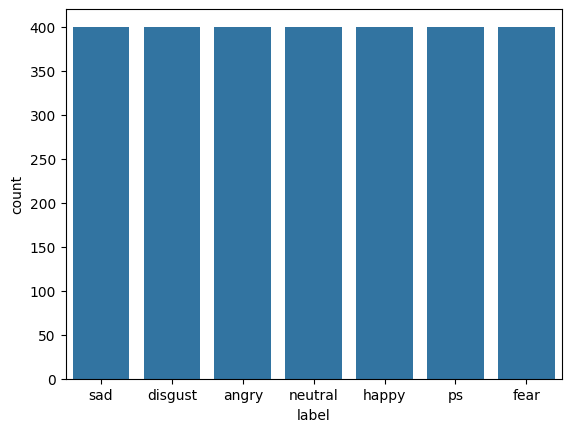

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())


                                              speech  label
0  /content/tess toronto emotional speech set dat...  angry
1  /content/tess toronto emotional speech set dat...  angry
2  /content/tess toronto emotional speech set dat...  angry
3  /content/tess toronto emotional speech set dat...  angry
4  /content/tess toronto emotional speech set dat...  angry
['angry' 'disgust' 'sad' 'neutral' 'fear' 'ps' 'happy']


In [ ]:
df['speech'].unique().shape

(2800,)

In [ ]:
df.shape

(2800, 2)

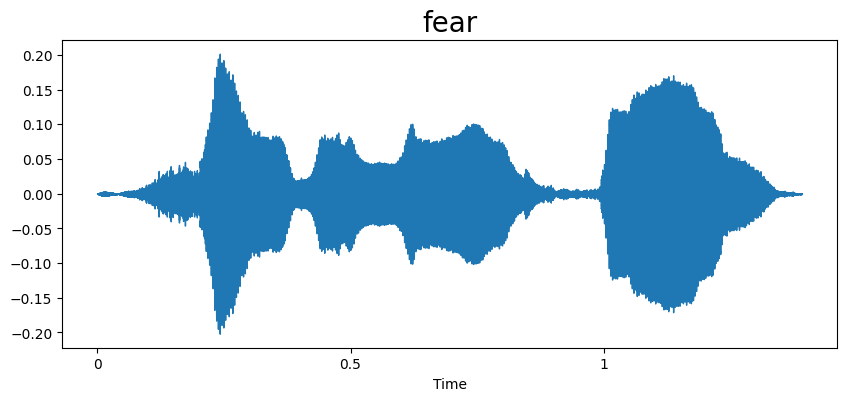

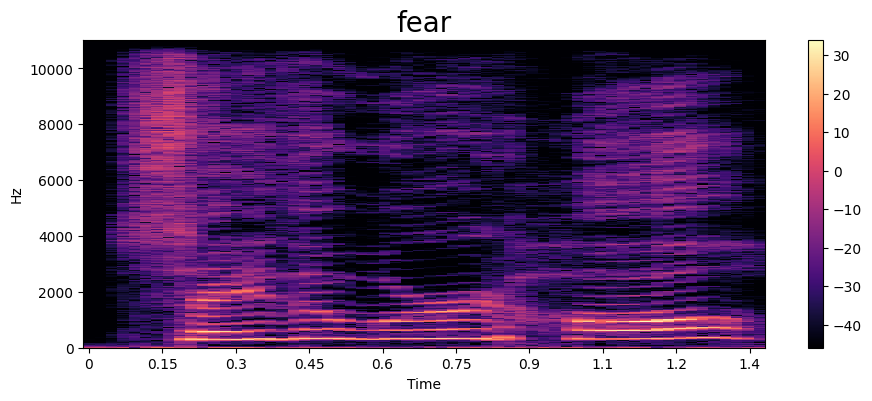

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


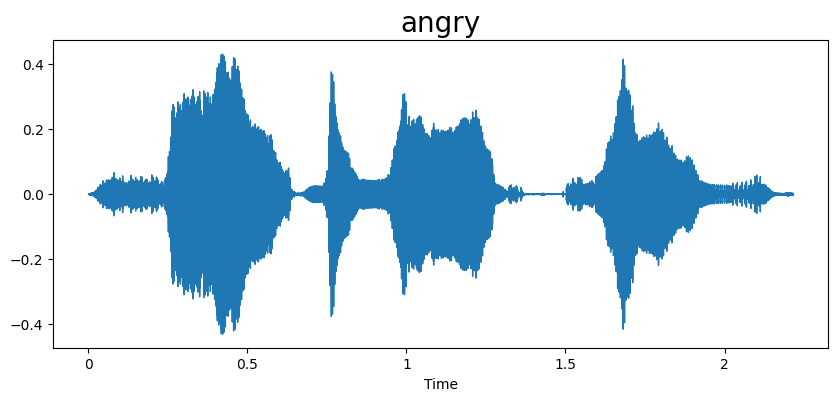

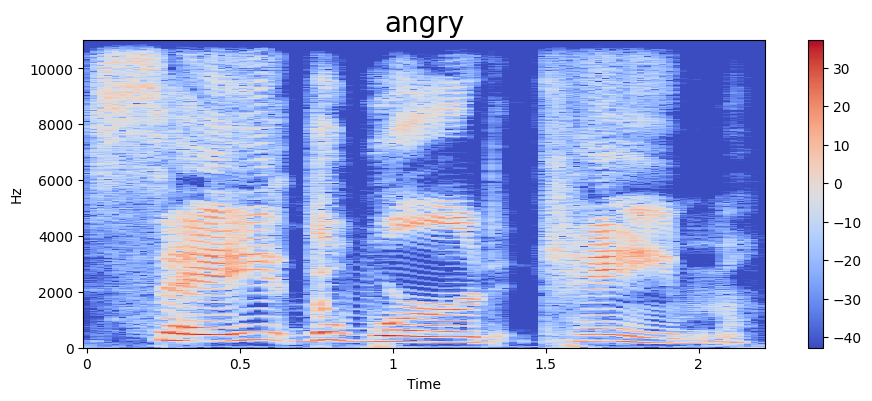

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


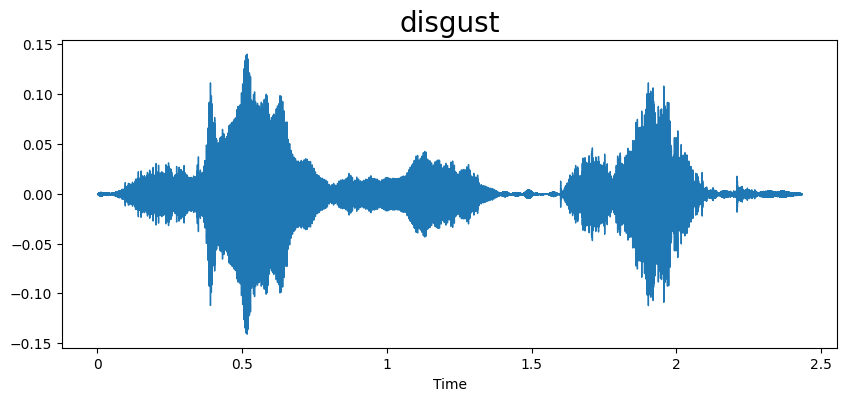

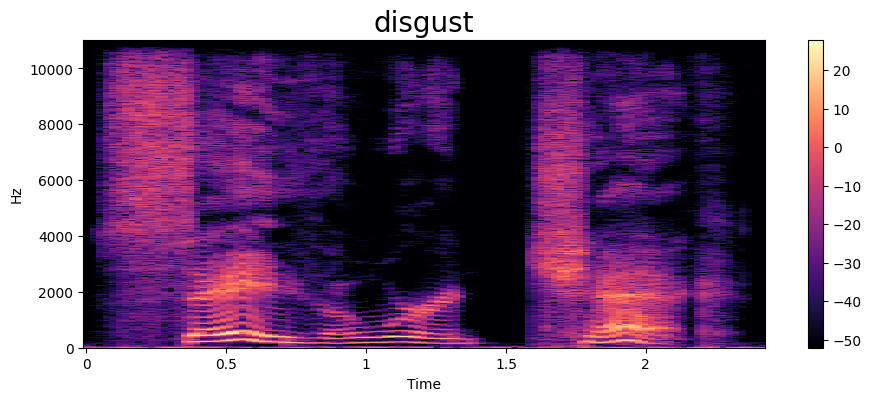

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


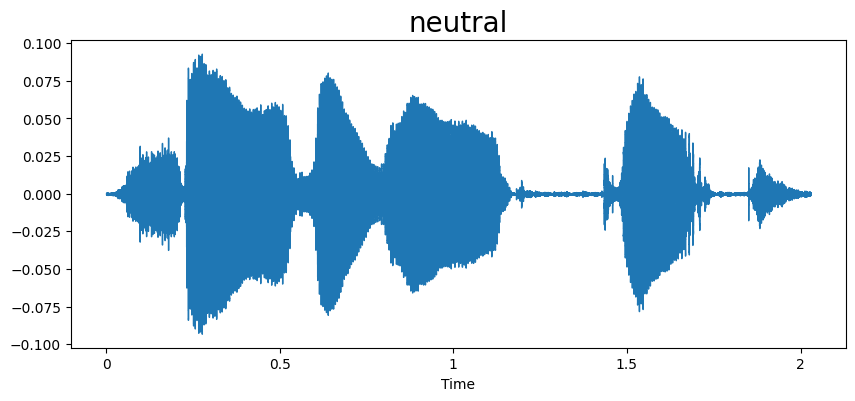

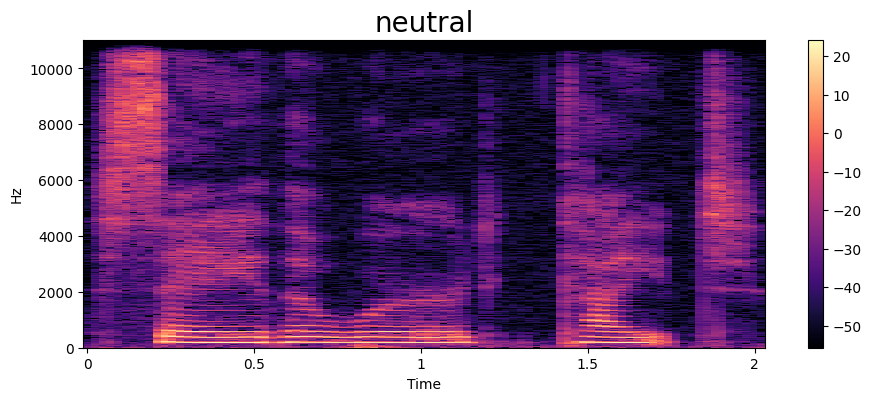

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


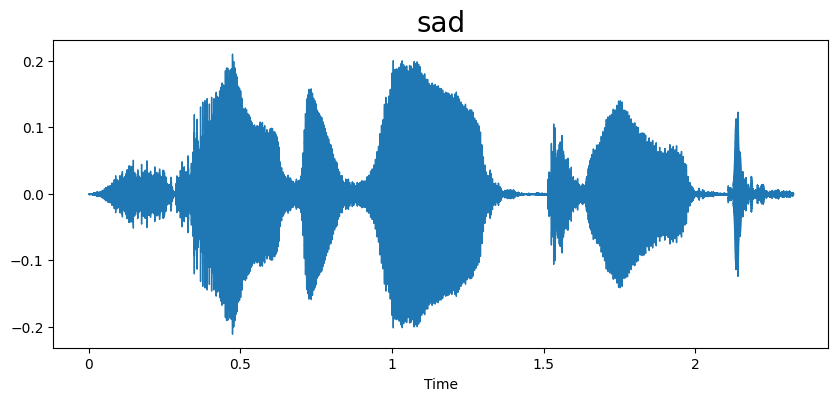

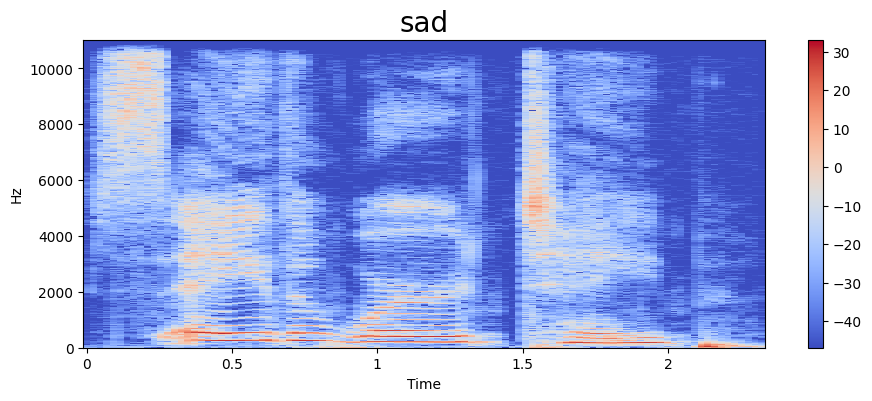

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


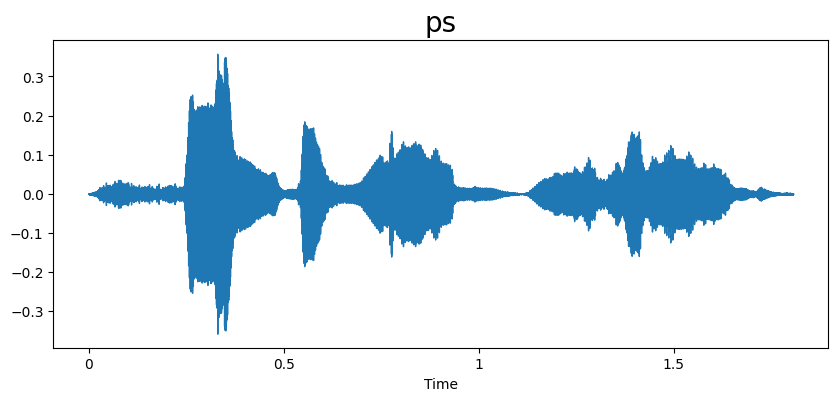

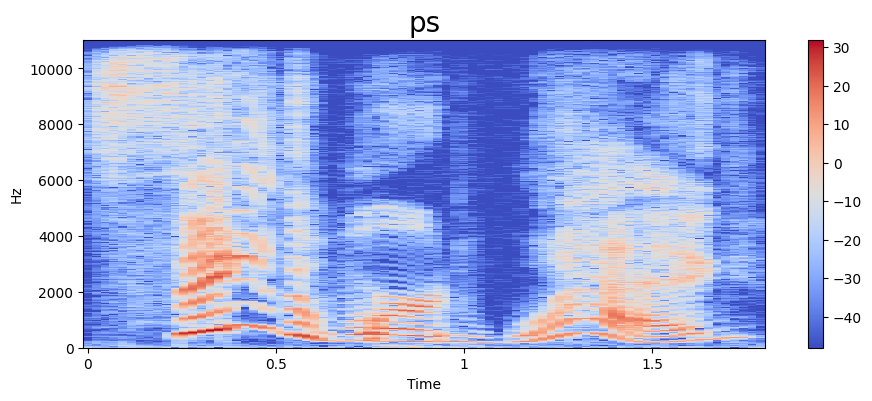

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


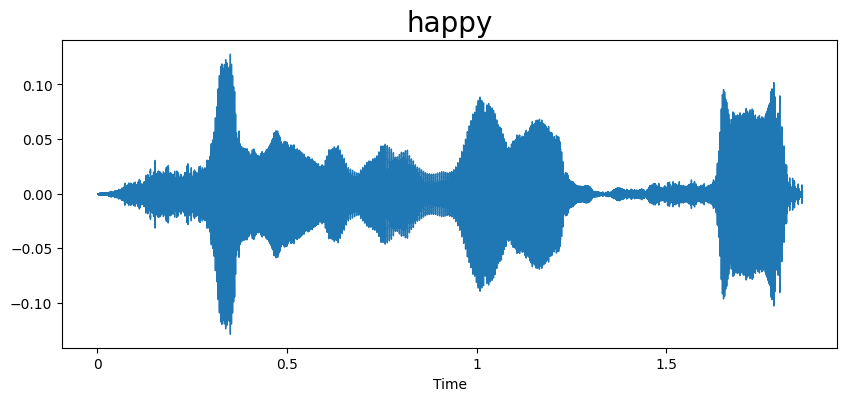

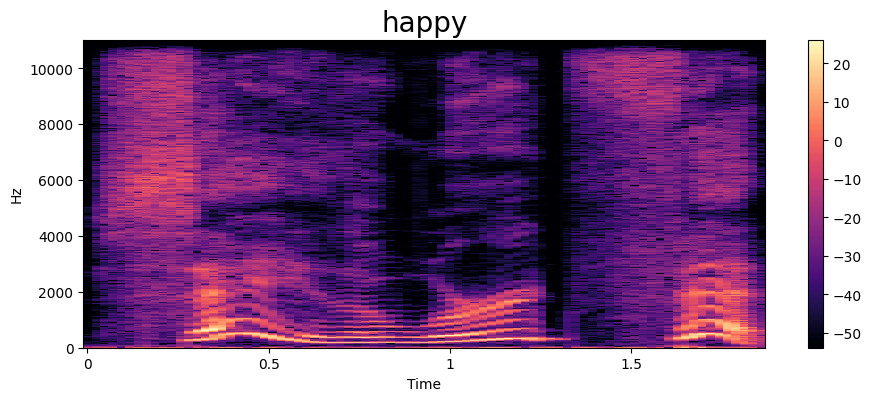

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [ ]:
extract_mfcc(df['speech'][0])

array([-3.3738782e+02,  4.1741875e+01,  6.5592360e+00,  1.1156029e+01,
       -2.9732992e+01, -6.1907297e-01, -1.1461535e+00, -2.3345587e+01,
       -5.0977340e+00, -2.6097066e+00, -8.7980442e+00,  6.3790302e+00,
       -1.3575298e+01,  1.1052222e+01,  1.1270156e+00, -2.8139770e+00,
        8.8713866e-01, -3.0329385e+00, -8.3331509e+00, -2.2624688e+00,
       -5.2441397e+00, -2.7782979e+00, -4.6090455e+00,  2.7617736e+00,
       -2.8202674e+00,  3.8260360e+00,  1.6916257e+00,  9.3776493e+00,
        1.1772798e+01,  1.7700132e+01,  1.1628393e+01,  1.2606504e+01,
        5.0196681e+00,  4.1795917e+00,  2.5496099e+00,  3.8788118e+00,
       -7.3347509e-01,  1.9554408e-01, -5.6782836e-01,  2.2589936e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-337.38782, 41.741875, 6.559236, 11.156029, -...
1       [-324.47803, 58.8687, 5.90573, 28.48319, -16.1...
2       [-376.36966, 67.50204, -3.9659445, 14.629604, ...
3       [-331.08987, 50.323307, -2.3734863, 23.397694,...
4       [-342.28876, 63.070385, -8.525372, 25.100397, ...
                              ...                        
2795    [-338.32495, 47.86236, -2.4196382, 8.506504, -...
2796    [-337.4977, 43.991352, -14.076281, 38.355892, ...
2797    [-319.32147, 55.26456, -9.951962, 4.2275333, -...
2798    [-335.68387, 36.44255, -23.881252, 14.001944, ...
2799    [-322.31674, 46.3295, -18.870401, 19.522768, -...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


LSTM MODEL


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 [==============================] - 7s 29ms/step - loss: 1.6781 - accuracy: 0.3388 - val_loss: 1.1466 - val_accuracy: 0.5696
Epoch 2/30
35/35 [==============================] - 0s 9ms/step - loss: 1.0472 - accuracy: 0.5978 - val_loss: 0.6007 - val_accuracy: 0.7857
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.7612 - val_loss: 0.3638 - val_accuracy: 0.8750
Epoch 4/30
35/35 [==============================] - 0s 8ms/step - loss: 0.4671 - accuracy: 0.8415 - val_loss: 0.2477 - val_accuracy: 0.9036
Epoch 5/30
35/35 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8853 - val_loss: 0.2583 - val_accuracy: 0.9089
Epoch 6/30
35/35 [==============================] - 0s 8ms/step - loss: 0.2858 - accuracy: 0.9094 - val_loss: 0.1212 - val_accuracy: 0.9571
Epoch 7/30
35/35 [==============================] - 0s 7ms/step - loss: 0.2522 - accuracy: 0.9299 - val_loss: 0.2839 - val_accuracy: 0.9036
Epoch 8/30
35/35 [=

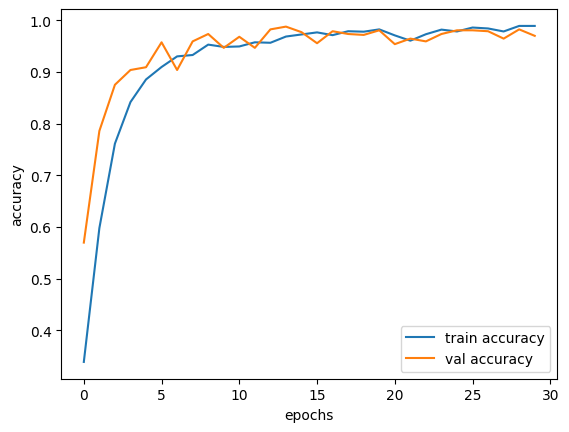

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


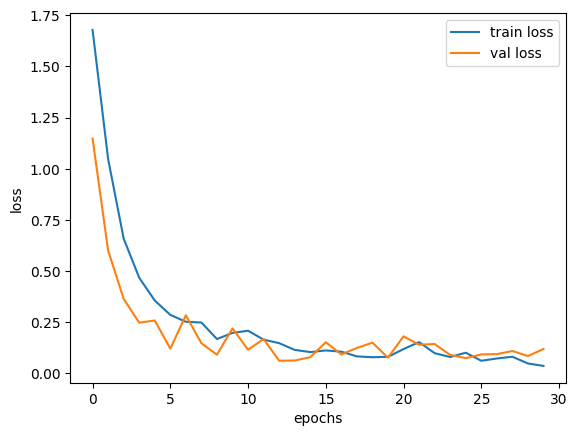

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 [==============================] - 1s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[76  0  1  0  0  0  0]
 [ 0 73  0  0  2  0  3]
 [ 0  0 62  1  0  0  0]
 [ 1  0  1 83  0  0  1]
 [ 0  0  0  0 74  0  0]
 [ 3  0  0  3  1 83  0]
 [ 0  0  0  0  0  0 92]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

       angry       0.95      0.99      0.97        77
     disgust       1.00      0.94      0.97        78
        fear       0.97      0.98      0.98        63
       happy       0.95      0.97      0.96        86
     neutral       0.96      1.00      0.98        74
          ps       1.00      0.92      0.96        90
         sad       0.96      1.00      0.98        92

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



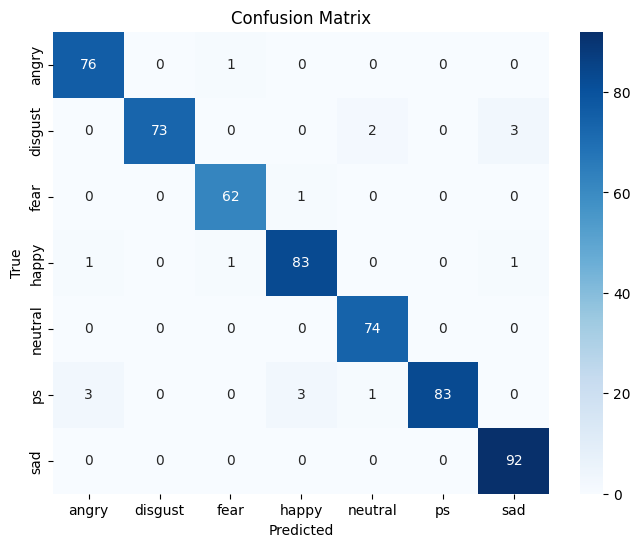

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
